<a href="https://colab.research.google.com/github/Pytseng0503/TEST/blob/master/size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
data = pd.read_excel("/content/chk202401.xlsx",'7')
data2 = pd.read_excel("/content/選股excel.xlsx")


/usr/local/lib/python3.10/dist-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: '14'!$A:$K.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/usr/local/lib/python3.10/dist-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: '15'!$A:$D.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


In [83]:
def data_handle(data):

    # 更改行名
    data.rename(columns={ data.columns[0]: "股票代號" }, inplace = True)

    # 移除股票代號中空格
    data['股票代號'] = data['股票代號'].str.replace(" ", "")

    # 篩出普通股
    data = data[(data['股票代號'].str.len()==4)]
    data = data.dropna(subset=data.columns[2])

    # 篩出需使用之欄位
    data = data.iloc[1:,[0,8,9,11]]
    data.rename(columns={ data.columns[0]: "股票代號",data.columns[1]: "本月底最後市價",data.columns[2]: "上月底最後市價",data.columns[3]: "發行股份" }, inplace = True)

    # 'resetindex&計算市值'
    data = data.reset_index(drop=True)
    data['市值'] = data['本月底最後市價']*data['發行股份']
    data['本月報酬'] = (data['本月底最後市價']-data['上月底最後市價'])/data['上月底最後市價']

    return data

In [87]:
def data_handle(data,data2):
    # '更改行名'
    data.rename(columns={ data.columns[0]: "股票代號" }, inplace = True)

    # '移除股票代號中空格'
    data['股票代號'] = data['股票代號'].str.replace(" ", "")

    # '篩出普通股'
    data = data[(data['股票代號'].str.len()==4)]
    data = data.dropna(subset=data.columns[2])

    # '篩出需使用之欄位'
    data = data.iloc[1:,[0,8,9,11]]
    data.rename(columns={ data.columns[0]: "股票代號",data.columns[1]: "本月底最後市價",data.columns[2]: "上月底最後市價",data.columns[3]: "發行股份" }, inplace = True)

    # 'resetindex&計算市值'
    data = data.reset_index(drop=True)
    data['市值'] = data['本月底最後市價']*data['發行股份']
    data['本月報酬'] = (data['本月底最後市價']-data['上月底最後市價'])/data['上月底最後市價']

    # 'merge_dataname'
    data2 = data2.iloc[:,[0,1]]
    data = pd.merge(data, data2, how='left', left_on="股票代號", right_on='代號')

    return data

In [139]:
data_final = data_handle(data,data2)

In [78]:
data2.iloc[:,[0,1]]

,代號,名稱
0,2330,台積電
1,2454,聯發科
2,2317,鴻海
3,2382,廣達
4,2412,中華電
...,...,...
1846,910861,神州-DR
1847,5345,天揚
1848,911868,同方友友-DR
1849,911622,泰聚亨-DR


In [89]:
data_final.sort_values(by=['市值'])

,股票代號,本月底最後市價,上月底最後市價,發行股份,市值,本月報酬,代號,名稱
770,3229,15.1,15.8,32263,487171.3,-0.044304,3229,晟鈦
622,2429,18.5,18.25,27011.2,499707.2,0.013699,2429,銘旺科
686,2424,31.05,30.3,18000,558900.0,0.024752,2424,隴華
488,2434,33.9,34.45,17000,576300.0,-0.015965,2434,統懋
776,3432,17,10.9,36000,612000,0.559633,3432,台端
...,...,...,...,...,...,...,...,...
684,2412,119,120,7757446.545,923136138.855,-0.008333,2412,中華電
569,2382,247,224.5,3862627.432,954068975.704,0.100223,2382,廣達
853,2317,102.5,104.5,13862990.609,1420956537.4225,-0.019139,2317,鴻海
493,2454,966,1015,1599647.322,1545259313.052,-0.048276,2454,聯發科


**GOUPBY Chapter 5_1.ipynb**

In [140]:
# 'got size rank
size_breakpoint = data_final['市值'].map(float).describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).reset_index().T
headers = size_breakpoint.iloc[0].values
size_breakpoint.columns = headers
size_breakpoint.drop(index='index', axis=0, inplace=True)

size_breakpoint = size_breakpoint[['10%','20%','30%','40%','50%','60%','70%','80%','90%',]]
size_breakpoint.columns = ['B1','B2','B3','B4','B5','B6','B7','B8','B9']
size_breakpoint["tmp"] = 1

data_final["tmp"] = 1
data_final = pd.merge(data_final,size_breakpoint, how='left', left_on="tmp", right_on="tmp")
data_final.drop('tmp',axis=1)

,股票代號,本月底最後市價,上月底最後市價,發行股份,市值,本月報酬,代號,名稱,B1,B2,B3,B4,B5,B6,B7,B8,B9
0,1101,31.9,34.85,7551181.742,240882697.5698,-0.084648,1101,台泥,2150911.84344,3275981.29956,4743951.552,6549147.3718,8683994.856,12145058.8312,19191862.83988,32279151.45982,95654627.9196
1,1102,39.75,41.45,3546562.324,140975852.379,-0.041013,1102,亞泥,2150911.84344,3275981.29956,4743951.552,6549147.3718,8683994.856,12145058.8312,19191862.83988,32279151.45982,95654627.9196
2,1103,17.85,19.05,790247.459,14105917.14315,-0.062992,1103,嘉泥,2150911.84344,3275981.29956,4743951.552,6549147.3718,8683994.856,12145058.8312,19191862.83988,32279151.45982,95654627.9196
3,1104,29.15,29.7,673217.467,19624289.16305,-0.018519,1104,環泥,2150911.84344,3275981.29956,4743951.552,6549147.3718,8683994.856,12145058.8312,19191862.83988,32279151.45982,95654627.9196
4,1108,15.2,15.8,404738.049,6152018.3448,-0.037975,1108,幸福,2150911.84344,3275981.29956,4743951.552,6549147.3718,8683994.856,12145058.8312,19191862.83988,32279151.45982,95654627.9196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,9940,29,29.95,736846.5,21368548.5,-0.03172,9940,信義,2150911.84344,3275981.29956,4743951.552,6549147.3718,8683994.856,12145058.8312,19191862.83988,32279151.45982,95654627.9196
985,9941,174.5,186,548225.092,95665278.554,-0.061828,9941,裕融,2150911.84344,3275981.29956,4743951.552,6549147.3718,8683994.856,12145058.8312,19191862.83988,32279151.45982,95654627.9196
986,9942,128.5,134.5,83161.32,10686229.62,-0.04461,9942,茂順,2150911.84344,3275981.29956,4743951.552,6549147.3718,8683994.856,12145058.8312,19191862.83988,32279151.45982,95654627.9196
987,9944,20.1,20.2,109107.1,2193052.71,-0.00495,9944,新麗,2150911.84344,3275981.29956,4743951.552,6549147.3718,8683994.856,12145058.8312,19191862.83988,32279151.45982,95654627.9196


In [141]:
def size_group(row):
    if row['市值']<=row['B1']:
        value='n1'
    elif row['B1']<=row['市值']<=row['B2']:
        value='n2'
    elif row['B2']<=row['市值']<=row['B3']:
        value='n3'
    elif row['B3']<=row['市值']<=row['B4']:
        value='n4'
    elif row['B4']<=row['市值']<=row['B5']:
        value='n5'
    elif row['B5']<=row['市值']<=row['B6']:
        value='n6'
    elif row['B6']<=row['市值']<=row['B7']:
        value='n7'
    elif row['B7']<=row['市值']<=row['B8']:
        value='n8'
    elif row['B8']<=row['市值']<=row['B9']:
        value='n9'
    elif row['B9']<=row['市值']:
        value='n10'
    return value

data_final['group'] = data_final.apply(size_group, axis=1)

In [145]:
data_final.groupby(['group'])['市值'].count().sum()

989

In [176]:
data_retrun = data_final.groupby(['group'])['本月報酬'].mean().reset_index().sort_values(by='group',key=lambda col: col.str.replace("n","").astype(int), ascending=True)


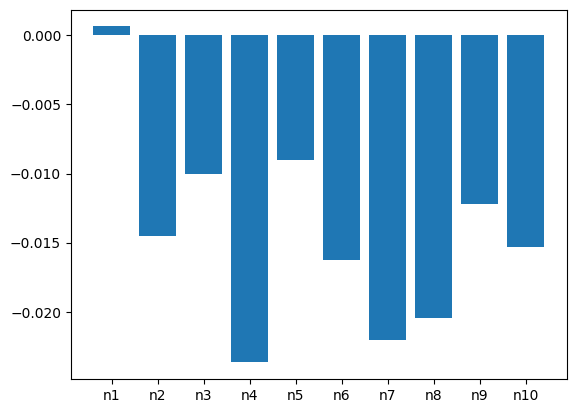

In [177]:
import matplotlib.pyplot as plt
x = data_retrun['group']
y = data_retrun['本月報酬']
plt.bar(x,y)
plt.show()